In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
nfcs_1 = pd.read_csv("../data/raw/NFCS 2009 State Data 130425.csv")
nfcs_2 = pd.read_csv("../data/raw/NFCS 2012 State Data 130503.csv")
nfcs_3 = pd.read_csv("../data/raw/NFCS 2015 State Tracking Data 160619.csv")
nfcs_4 = pd.read_csv("../data/raw/NFCS 2018 State Data 190603.csv")

C:\Users\altaf\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,16,31,35,38,50,51,52,53,54,55,56,70,71,72,73,74,75,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nfcs_new = nfcs_1[["b1", "g5_1", "g5_2", "g5_4", "g5_5"]]

In [4]:
nfcs_2['YEAR'] = 2012
nfcs_3['YEAR'] = 2015
nfcs_4['YEAR'] = 2018

In [5]:
nfcs_new.rename(columns = {"b1" : "B1", "g5_1" : "G25_1", "g5_2" : "G25_2", "g5_4" : "G25_4", "g5_5" : "G25_5"}, inplace = True)

C:\Users\altaf\Anaconda3\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
nfcs_new

,B1,G25_1,G25_2,G25_4,G25_5
0,99,2,2,1,1
1,1,2,2,2,2
2,1,2,2,2,2
3,1,2,2,2,2
4,1,2,2,2,2
...,...,...,...,...,...
28141,2,2,2,1,2
28142,2,2,2,2,2
28143,1,1,1,1,1
28144,2,2,2,2,2


In [7]:
frames = [nfcs_2, nfcs_3, nfcs_4]

nfcs_monster = pd.concat(frames)

In [8]:
nfcs_monsterr = nfcs_monster[["B1", "G25_1", "G25_2", "G25_4", "G25_5", "YEAR"]]

In [9]:
nfcs_1["b1"].isnull().sum()

0

In [10]:
nfcs_1

,respid,stateq,censusdiv,censusreg,a3,a3ar_w,a3b,a4a_new_w,a5,a6,...,m1_3,m4,m6,m7,m8,m9,m10,wgt_s3,wgt_n2,wgt_d2
0,57,7,1,1,2,4,10,2,1,1,...,3,6,99,3,1,1,2,1.247684,0.510810,1.887200
1,130,22,1,1,1,5,5,1,5,2,...,5,5,3,3,1,1,2,0.791143,0.293528,2.054242
2,144,7,1,1,2,5,11,1,2,5,...,5,5,1,2,2,1,98,1.245151,0.530780,1.880146
3,191,22,1,1,1,5,5,1,5,1,...,4,6,2,3,2,1,2,0.791143,0.293528,2.054242
4,217,22,1,1,2,5,11,1,3,2,...,7,5,1,98,1,1,2,1.357932,0.530780,3.629356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28141,268093,38,9,4,1,1,1,1,2,2,...,4,5,1,98,2,2,1,1.344298,2.127866,0.469365
28142,268349,38,9,4,1,1,1,1,2,2,...,5,4,98,98,98,98,98,1.344298,2.127866,0.469365
28143,269319,12,9,4,1,3,3,2,4,1,...,7,7,3,98,3,98,2,0.628882,1.765813,0.093399
28144,269329,2,9,4,2,1,7,2,2,2,...,1,1,3,3,4,2,1,1.369808,2.591416,0.132285


In [11]:
nfcs_monsterr

,B1,G25_1,G25_2,G25_4,G25_5,YEAR
0,1,1,1,1,1,2012
1,1,1,1,1,1,2012
2,1,1,1,1,1,2012
3,1,1,1,1,1,2012
4,1,1,2,2,5,2012
...,...,...,...,...,...,...
27086,1,1,1,1,1,2018
27087,99,1,1,99,1,2018
27088,2,1,5,1,1,2018
27089,1,5,5,4,2,2018


In [12]:
nfcs_monsterr.shape

(133819, 6)

In [13]:
nfcs_monsterr.describe()

,B1,YEAR
count,133819.000000,133819.000000
mean,2.757000,2015.035466
std,12.704415,1.880527
min,1.000000,2012.000000
25%,1.000000,2015.000000
50%,1.000000,2015.000000
75%,1.000000,2015.000000
max,99.000000,2018.000000


In [14]:
nfcs_monsterr.sum()

B1         368939
YEAR    269650031
dtype: int64

In [15]:
nfcs_monsterr.isnull().sum()/len(nfcs_monsterr)*100

B1       0.0
G25_1    0.0
G25_2    0.0
G25_4    0.0
G25_5    0.0
YEAR     0.0
dtype: float64

In [16]:
nfcs_monsterr.YEAR.value_counts()

2015    81219
2018    27091
2012    25509
Name: YEAR, dtype: int64

In [17]:
nfcs_monsterr.shape

(133819, 6)

In [18]:
nfcs_monsterr['B1'].isnull().sum()

0

In [19]:
nfcs_monsterr['B1']

0         1
1         1
2         1
3         1
4         1
         ..
27086     1
27087    99
27088     2
27089     1
27090     1
Name: B1, Length: 133819, dtype: int64

In [20]:
for i in list(nfcs_monsterr.YEAR.unique()):
    print(i)
    display(nfcs_monsterr[nfcs_monsterr.YEAR == i].isnull().sum()/len(nfcs_monsterr)*100)

2012


B1       0.0
G25_1    0.0
G25_2    0.0
G25_4    0.0
G25_5    0.0
YEAR     0.0
dtype: float64

2015


B1       0.0
G25_1    0.0
G25_2    0.0
G25_4    0.0
G25_5    0.0
YEAR     0.0
dtype: float64

2018


B1       0.0
G25_1    0.0
G25_2    0.0
G25_4    0.0
G25_5    0.0
YEAR     0.0
dtype: float64

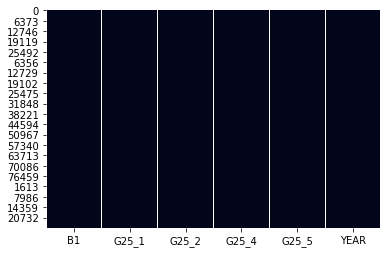

In [21]:
sns.heatmap(nfcs_monsterr.isnull(), cbar=False)

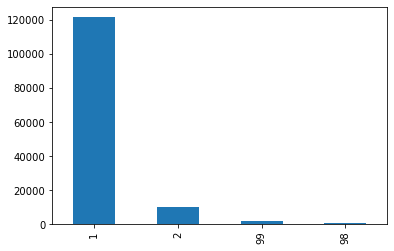

In [22]:
nfcs_monsterr["B1"].value_counts().plot.bar()

In [23]:
nfcs_monsterr.columns

Index(['B1', 'G25_1', 'G25_2', 'G25_4', 'G25_5', 'YEAR'], dtype='object')

In [24]:
nfcs_monsterr.rename(columns = {"B1" : "checking_account",
                                "G25_1" : "auto_title_loan",
                                "G25_2" : "payday_loan",
                                "G25_3" : "tax_refund",
                                "G25_4" : "pawn_shop",
                                "G25_5" : "rent_to_own",},
                     inplace = True)

C:\Users\altaf\Anaconda3\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
nfcs_monsterr

,checking_account,auto_title_loan,payday_loan,pawn_shop,rent_to_own,YEAR
0,1,1,1,1,1,2012
1,1,1,1,1,1,2012
2,1,1,1,1,1,2012
3,1,1,1,1,1,2012
4,1,1,2,2,5,2012
...,...,...,...,...,...,...
27086,1,1,1,1,1,2018
27087,99,1,1,99,1,2018
27088,2,1,5,1,1,2018
27089,1,5,5,4,2,2018


In [26]:
checking_account = nfcs_monsterr[["checking_account", "YEAR"]]

In [27]:
checking_account['YEAR']

0        2012
1        2012
2        2012
3        2012
4        2012
         ... 
27086    2018
27087    2018
27088    2018
27089    2018
27090    2018
Name: YEAR, Length: 133819, dtype: int64

In [28]:
checking_account.dtypes

checking_account    int64
YEAR                int64
dtype: object

In [29]:
checking_account.replace({1 : 'yes', 2 : 'no', 98 : 'Dont Know', 99 : 'prefer not to say'})

,checking_account,YEAR
0,yes,2012
1,yes,2012
2,yes,2012
3,yes,2012
4,yes,2012
...,...,...
27086,yes,2018
27087,prefer not to say,2018
27088,no,2018
27089,yes,2018


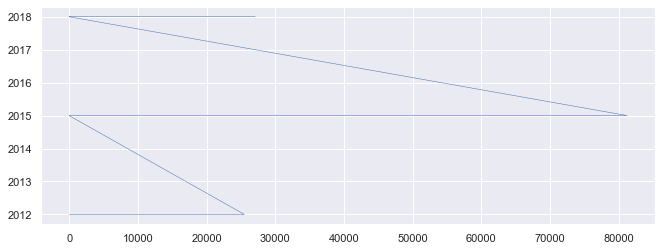

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

checking_account['YEAR'].plot(linewidth=0.5);

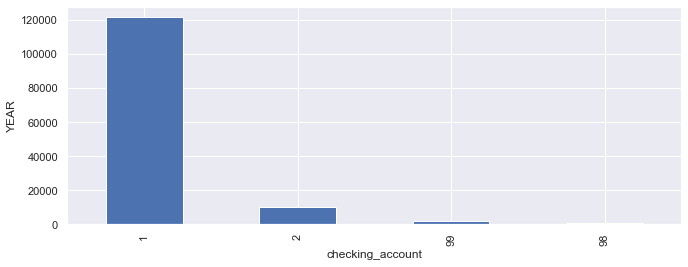

In [31]:
checking_account["checking_account"].value_counts().plot.bar()
plt.xlabel('checking_account')
plt.ylabel('YEAR')
ticklabel = ['YEAR']

In [33]:
nfcs_monsterr

,checking_account,auto_title_loan,payday_loan,pawn_shop,rent_to_own,YEAR
0,1,1,1,1,1,2012
1,1,1,1,1,1,2012
2,1,1,1,1,1,2012
3,1,1,1,1,1,2012
4,1,1,2,2,5,2012
...,...,...,...,...,...,...
27086,1,1,1,1,1,2018
27087,99,1,1,99,1,2018
27088,2,1,5,1,1,2018
27089,1,5,5,4,2,2018


In [32]:
nfcs_monsterr.to_csv("../data/processed/NFCS_2009_2018_clean")

# TBD..